# Project: Customer Churn

Project: Customer Churn Prediction

Context The goal of this project is to develop a machine learning model to predict whether a customer will churn or not from a telecommunications company. The term “churn” refers to the loss of customers, which is a significant challenge for businesses since retaining customers is often more cost-effective than acquiring new ones.

Business Problem The telecommunications company has observed a high churn rate, which negatively impacts its revenue and stability. The data analytics team has decided to utilize machine learning techniques to predict which customers are at risk of leaving the company, allowing them to take proactive measures to retain them.

Project Objective The primary objective is to build a classification model that predicts whether a customer will leave the company (Churn = Yes) or stay (Churn = No). This model will help the marketing and sales teams identify at-risk customers and develop retention strategies such as promotions or discounts.

Project Strategy

Understand Customer Behavior: Analyze which characteristics (e.g., age, income, contract duration) are related to customer churn.
Develop a Machine Learning Model: Train a model that learns from the behavior patterns of customers who have churned and those who have remained.
Evaluate the Model: Assess the model's accuracy and generalization ability using metrics such as accuracy, precision, recall, and the confusion matrix.
Deploy the Model: Create an API or application so that company analysts can use the model for real-time predictions.

## 1. Problem Description

Create a classification model to predict the target variable.

## 2. Libraries and Appearance

### 2.1. Libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

### 2.2 Appearance

In [30]:
sns.set_theme(style='dark', palette='deep', font_scale=1.2)

## 3. DataSet

About Dataset
This Global Customer Churn Dataset is meticulously curated to aid in understanding and predicting customer churn Behaviour across various industries. With detailed customer profiles, including demographics, product interactions, and banking behaviors, this dataset is an invaluable resource for developing machine learning models aimed at identifying at-risk customers and devising targeted retention strategies."

Data Description:
Break down the dataset in detail, describing what each column represents:

RowNumber: A unique identifier for each row in the dataset.

CustomerId: Unique customer identification number.

Surname: The last name of the customer (for privacy reasons, consider anonymizing this data if not already done).

CreditScore: The customer's credit score at the time of data collection.

Geography: The customer's country or region, providing insights into location-based trends in churn.

Gender: The customer's gender.

Age: The customer's age, valuable for demographic analysis.

Tenure: The number of years the customer has been with the bank.

Balance: The customer's account balance.

NumOfProducts: The number of products the customer has purchased or subscribed to.

HasCrCard: Indicates whether the customer has a credit card (1) or not (0).

IsActiveMember: Indicates whether the customer is an active member (1) or not (0).

EstimatedSalary: The customer's estimated salary.

Exited: The target variable, indicating whether the customer has churned (1) or not (0).

This dataset is primed for exploratory data analysis, customer segmentation, predictive modeling to churn behaviour,

and the development of customer retention strategies. It offers rich insights for business strategists, data scientists, and researchers interested in improving customer loyalty and reducing churn rates.

URL = https://www.kaggle.com/datasets/anandshaw2001/customer-churn-dataset?resource=download

### 3.1. Dataset load

In [31]:
ruta_actual = Path.cwd()
ruta_relativa = ruta_actual / 'data' / 'datos.csv'
print(ruta_relativa)

/home/daniel/Drive WLS/Proyectos/Customer_Churn_Telecommunications/data/datos.csv


In [32]:
data_file = ruta_relativa
df_raw = pd.read_csv(data_file)
df_raw.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [33]:
df_processed = df_raw.rename(columns={"Exited":"target"})
df_processed.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,target
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 4. Data cleaning

### 4.1. Null handling

In [34]:
df_processed.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
target             0
dtype: int64

/home/daniel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


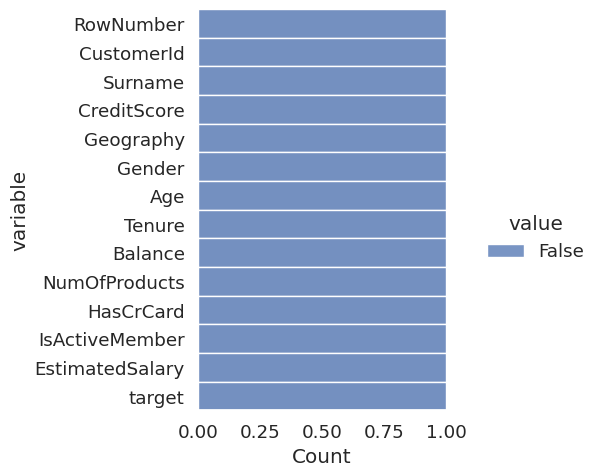

In [35]:
melted_df = df_processed.isnull().melt()
sns.displot(
    data=melted_df,
    y="variable",
    hue="value",
    multiple="fill")
plt.show()

### 4.2. Remove Nulls

In [36]:
df_processed.dropna(inplace=True)

### 4.3. Delete Data

#### Delete unnecessary columns

In [37]:
df_processed.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'target'],
      dtype='object')

In [39]:
df_processed.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df_processed.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,target
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 5. Exploratory data analysis